In [82]:
from  sklearn.model_selection  import train_test_split,GridSearchCV
from  sklearn.metrics import mean_squared_error,r2_score
from  sklearn.linear_model import LinearRegression,LogisticRegression 
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt

In [24]:
data_test=pd.read_csv('E:\jupyter\ml_learn\ML100Days\d48/test.csv',header=None)
data_train=pd.read_csv('E:\jupyter\ml_learn\ML100Days\d48/train.csv',header=None)
label_train=pd.read_csv('E:\jupyter\ml_learn\ML100Days\d48/trainLabels.csv',header=None)

In [134]:
label_train=label_train.rename({0:'result'},axis='columns')

In [135]:
print(data_test.head(),len(data_test))

print(data_train.head())

print(labe_train.head())

         0         1         2         3         4         5         6   \
0  2.808909 -0.242894 -0.546421  0.255162  1.749736 -0.030458 -1.322071   
1 -0.374101  0.537669  0.081063  0.756773  0.915231  2.557282  3.703187   
2 -0.088370  0.154743  0.380716 -1.176126  1.699867 -0.258627 -1.384999   
3 -0.685635  0.501283  1.873375  0.215224 -3.983468 -0.103637  4.136113   
4  0.350867  0.721897 -0.477104 -1.748776 -2.627405  1.075433  4.954253   

         7         8         9   ...        30        31        32        33  \
0  3.578071 -0.667578 -0.884257  ... -0.261688 -0.224375 -1.675606 -0.479584   
1  1.673835 -0.764122 -1.228040  ... -0.969463  0.574154 -2.200519 -1.612240   
2  1.093584  1.596633  0.230631  ... -0.769885 -0.005143  1.467490  0.483803   
3 -0.225431 -1.515015 -1.071763  ...  0.968609  2.386412 -0.131219  0.285646   
4 -3.293501 -0.760369  0.204360  ...  0.260553 -2.045650 -2.173227  0.372992   

         34        35        36        37        38        39  
0 -0

In [244]:
def split(data_train,label_train):
    X_train,X_test,y_train,y_test=train_test_split(data_train,labe_train,test_size=0.2,random_state=4)
    return X_train,X_test,y_train,y_test

In [137]:
regr=LinearRegression()

regr.fit(X_train,y_train)
y_pre_regr=regr.predict(X_test)

logr=LogisticRegression()
logr.fit(X_train,y_train)
y_pre_logr=logr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
print('LinearRegression',mean_squared_error(y_pre_regr,y_test))
print('LogisticRegression',mean_squared_error(y_pre_logr,y_test))

LinearRegression 0.13211461387081072
LogisticRegression 0.17


In [126]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [183]:
def Normal_RandomForestClassifier(X_train,y_train):
    rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)
    rfc.fit(X_train,y_train)
    y_pre_rfc=rfc.predict(X_test)
    print("RandomForestClassifier",mean_squared_error(y_pre_rfc,y_test))
    print('grid_result.best_score=',grid_result.best_score_,
     'grid_result.best_index_=',grid_result.best_index_,
     'grid_result.best_params_=',grid_result.best_params_,
     'grid_result.best_estimator_=',grid_result.best_estimator_,sep='\n\n\n')
    return y_pre_rfc

grid_result.best_score=


-0.15875


grid_result.best_index_=


21


grid_result.best_params_=


{'max_depth': 5, 'n_estimators': 200}


grid_result.best_estimator_=


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [226]:
def Grid_search_RandomForestClassifier(X_train,y_train,X_test):
    n_estimators=[100,300,500]
    max_depth=[1,2,3]
    param_grid=dict(n_estimators=n_estimators,max_depth=max_depth)

    grid_search=GridSearchCV(rfc,param_grid,scoring='neg_mean_squared_error',n_jobs=1,verbose=1)
    grid_result=grid_search.fit(X_train,y_train)
    
    
    print('grid_result.best_score=',grid_result.best_score_,
     'grid_result.best_index_=',grid_result.best_index_,
     'grid_result.best_params_=',grid_result.best_params_,
     'grid_result.best_estimator_=',grid_result.best_estimator_,sep='\n\n\n')
    
    
    n_rfc=RandomForestClassifier(n_estimators=grid_result.best_params_['n_estimators'],criterion='entropy',max_depth=grid_result.best_params_['max_depth'])
    n_rfc.fit(X_train,y_train)
    y_pre_n_rfc=n_rfc.predict(X_test)
    print("RandomForestClassifier mean_squared_error",mean_squared_error(y_pre_rfc,y_test))
    return y_pre_n_rfc

In [180]:
corr_df=pd.concat([data_train,label_train],axis=1)
head5=list(corr_df.corr()['result'].sort_values(ascending=True).head().index)
tail5=list(corr_df.corr()['result'].sort_values(ascending=True).index[-6:-1])

In [246]:
new_data_train=pd.concat([data_train[head5],data_train[tail5]],axis=1)
X2_train,X2_test,y2_train,y2_test=split(new_data_train,labe_train)
new_data_test=pd.concat([data_test[head5],data_test[tail5]],axis=1)

In [247]:
y_pre_n_rfc=Grid_search_RandomForestClassifier(X2_train,y2_train,new_data_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514:

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

grid_result.best_score=


-0.18625


grid_result.best_index_=


7


grid_result.best_params_=


{'max_depth': 3, 'n_estimators': 300}


grid_result.best_estimator_=


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier mean_squared_error 0.19


In [266]:
result2=pd.DataFrame(y_pre_n_rfc)

result2=result2.reset_index().rename({'index':'ID',0:'Solution'},axis='columns')
result2['ID']=result2['ID']+1
result2.to_csv('E:\jupyter\ml_learn\ML100Days\d48/result1.csv',index=False)

In [268]:
result2

,ID,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
8995,8996,0
8996,8997,1
8997,8998,1
8998,8999,0


## Result

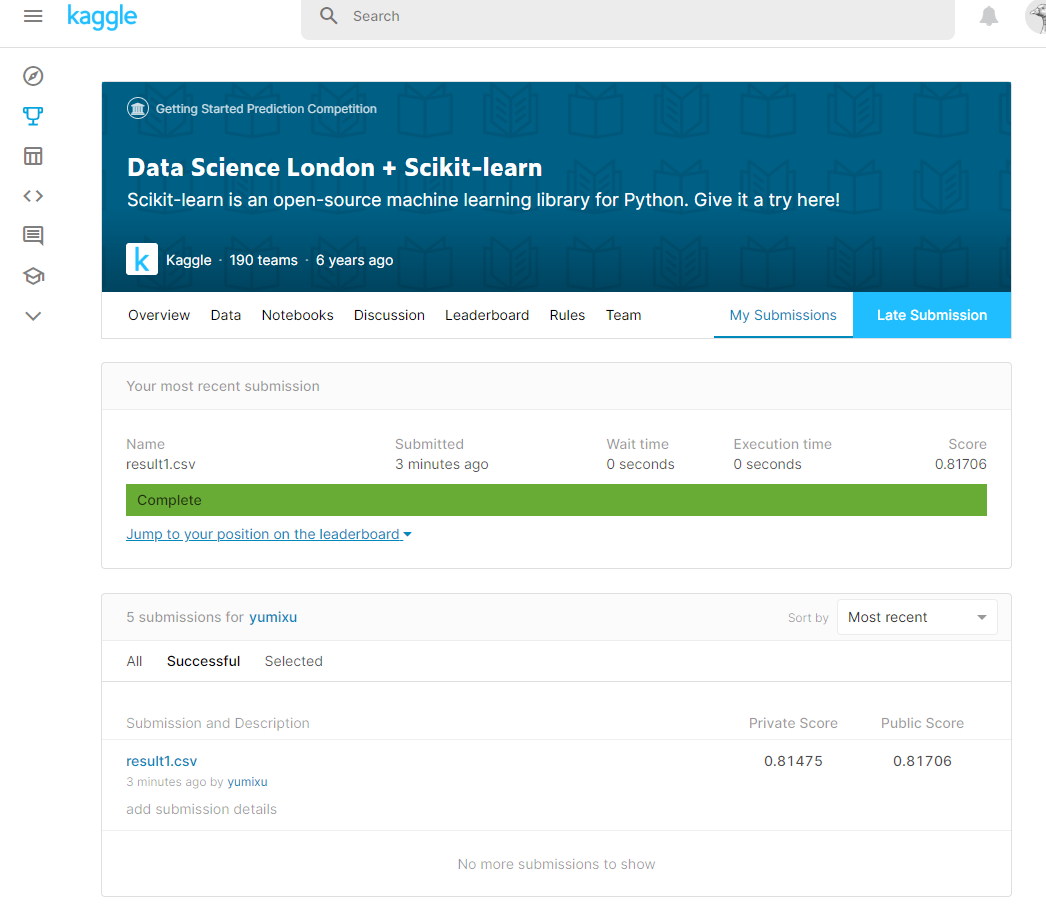